# Plotting output of elfe3D (field components)
written by Paula Rulff, 20-11-2024

In this notebook, we plot the real and imaginary parts of the electric field components along distance.
Adapt for magnetic field components by loading the magnetic field component file and changing the plot labels.

### Steps:
1. Load the data from the files.
2. Extract the frequency, real parts, and imaginary parts of the fields.
3. Plot the real part and imaginary part in separate subplots for different fields and at different frequencies.


In [22]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt


## Step 0: provide survey information

Specify the number of receivers, number of frequencies and receiver coordinates along the profile here.
The plots will only be for one frequency, which also has to be specified here.

In [23]:
# total number of frequencies in input file
num_freq = 3
# id of frequency you want to plot (0, ..., numfreq-1)
freq_id = 1
# total number of receivers in input file
num_rec = 73
# receiver coordinates along profile
rec_coordinates = np.linspace(200, 2000, 73) 
# Display receiver coordinates
rec_coordinates

array([ 200.,  225.,  250.,  275.,  300.,  325.,  350.,  375.,  400.,
        425.,  450.,  475.,  500.,  525.,  550.,  575.,  600.,  625.,
        650.,  675.,  700.,  725.,  750.,  775.,  800.,  825.,  850.,
        875.,  900.,  925.,  950.,  975., 1000., 1025., 1050., 1075.,
       1100., 1125., 1150., 1175., 1200., 1225., 1250., 1275., 1300.,
       1325., 1350., 1375., 1400., 1425., 1450., 1475., 1500., 1525.,
       1550., 1575., 1600., 1625., 1650., 1675., 1700., 1725., 1750.,
       1775., 1800., 1825., 1850., 1875., 1900., 1925., 1950., 1975.,
       2000.])

## Step 1: Load the Data

We will load the data from a text file using NumPy's `loadtxt` function. 
Each row in the E-field file contains a frequency, real part of the \( E_x \) field, and imaginary part of the \( E_x \) field, real part of the \( E_y \) field, and imaginary part of the \( E_y \) field, real part of the \( E_z \) field, and imaginary part of the \( E_z \) field.
The H-field files have the same structure.


In [24]:
# Load the data from the text file
# Adjust the nameof the file and path if needed.
data = np.loadtxt('CSEM_input_model_reference_q1.3_electric_fields_receiver_line.txt')

# Display the first few rows of the data to verify it's loaded correctly
data[:5]


array([[ 1.00000000e+00,  4.62287875e-05,  3.27283166e-09,
        -5.57782223e-07,  5.49949476e-11, -1.65462409e-06,
        -5.09839272e-11],
       [ 1.00000000e+00,  3.05162543e-05,  2.85033600e-09,
        -3.12063814e-08,  5.73993845e-11, -8.23302572e-07,
        -4.21446952e-11],
       [ 1.00000000e+00,  2.12994082e-05,  2.56964736e-09,
        -2.09619743e-07,  6.09420009e-11, -4.72464638e-07,
        -3.08035805e-11],
       [ 1.00000000e+00,  1.56619424e-05,  2.33622393e-09,
         1.20886980e-07,  6.78197574e-11, -1.56357664e-07,
        -2.27465206e-11],
       [ 1.00000000e+00,  1.20946678e-05,  2.16401118e-09,
        -2.22678717e-08,  6.64359969e-11, -1.85754043e-07,
        -1.22669647e-11]])

## Step 2: Extract the Columns

We will extract the frequency, real parts, and imaginary parts from the loaded data into separate variables.


In [25]:
# Extract columns from the data
frequency = data[:, 0]  # First column: frequency (for reference)
real_Ex = data[:, 1]    # Second column: real part of Ex
imag_Ex = data[:, 2]    # Third column: imaginary part of Ex
real_Ey = data[:, 3]    # Second column: real part of Ey
imag_Ey = data[:, 4]    # Third column: imaginary part of Ey
real_Ez = data[:, 5]    # Second column: real part of Ez
imag_Ez = data[:, 6]    # Third column: imaginary part of Ez

# Display the extracted values (optional)
print(frequency[:5], real_Ex[:5], imag_Ex[:5])


[1. 1. 1. 1. 1.] [4.62287875e-05 3.05162543e-05 2.12994082e-05 1.56619424e-05
 1.20946678e-05] [3.27283166e-09 2.85033600e-09 2.56964736e-09 2.33622393e-09
 2.16401118e-09]


## Step 3: Plot the Data in Separate Subplots

Now, we will plot the real and imaginary parts of the electric field components in separate panels within one figure. The x-axis will represent the distance (receiver stations).
Adjust for the field component you would like to plot!


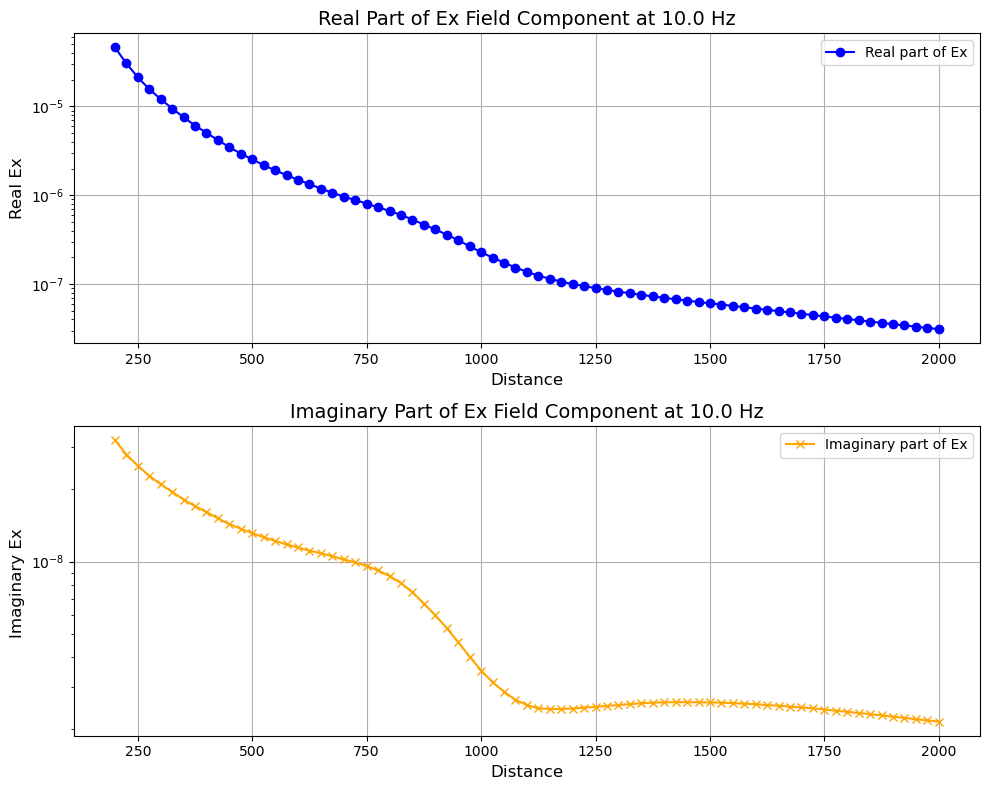

In [26]:
# Create a figure with two subplots (real and imaginary parts)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Sampling points as the x-axis (just use the row indices as sample points)
sampling_points = rec_coordinates
# sampling_points = np.arange(len(real_Ex))

# row index in file
irow = freq_id * num_rec


# Plot the real part of Ex
axes[0].plot(sampling_points, real_Ex[irow:irow+num_rec], label='Real part of Ex', color='blue', linestyle='-', marker='o')
axes[0].set_xlabel('Distance', fontsize=12)
axes[0].set_ylabel('Real Ex', fontsize=12)
axes[0].set_title(f'Real Part of Ex Field Component at {frequency[irow]} Hz', fontsize=14)
axes[0].set_yscale('log')  # Set the y-axis to logarithmic scale
axes[0].grid(True)
axes[0].legend()

# Plot the imaginary part of Ex
axes[1].plot(sampling_points, imag_Ex[irow:irow+num_rec], label='Imaginary part of Ex', color='orange', linestyle='-', marker='x')
axes[1].set_xlabel('Distance', fontsize=12)
axes[1].set_ylabel('Imaginary Ex ', fontsize=12)
axes[1].set_title(f'Imaginary Part of Ex Field Component at {frequency[irow]} Hz',fontsize=14)
axes[1].set_yscale('log')  # Set the y-axis to logarithmic scale
axes[1].grid(True)
axes[1].legend()

# Adjust layout for better spacing between the subplots
plt.tight_layout()

# Show the plot
plt.savefig('electric_field_component.png', dpi=300)
plt.show()

